In [10]:
import requests

# 从 token.txt 文件中读取 token
with open('./token.txt', 'r') as file:
    token = file.read().strip()

# 设置请求头中的 Authorization 标头
headers = {
    'Authorization': f'Bearer {token}'
}

url = 'http://localhost:1234/marketindex/momentum'

In [11]:
my_data = []

response = requests.get(url, headers=headers)

if response.status_code == 200:
    my_data = response.json()
    print('Response data:', my_data)  # 输出响应数据
else:
    print('Request failed with status code:', response.status_code)

Response data: [{'createdAt': '2024-03-27 04', 'volume': 1.35}, {'createdAt': '2024-03-27 06', 'volume': 1.37}, {'createdAt': '2024-03-27 07', 'volume': 1.21}, {'createdAt': '2024-03-27 08', 'volume': 1.19}, {'createdAt': '2024-03-27 09', 'volume': 1.3}, {'createdAt': '2024-03-28 02', 'volume': 1.06}, {'createdAt': '2024-03-28 03', 'volume': 1.09}, {'createdAt': '2024-03-28 04', 'volume': 1.2}, {'createdAt': '2024-03-28 06', 'volume': 1.31}, {'createdAt': '2024-03-28 08', 'volume': 1.4}, {'createdAt': '2024-03-28 09', 'volume': 1.38}, {'createdAt': '2024-03-29 02', 'volume': 1.42}, {'createdAt': '2024-03-29 03', 'volume': 1.36}, {'createdAt': '2024-03-29 04', 'volume': 1.33}, {'createdAt': '2024-03-29 06', 'volume': 1.36}, {'createdAt': '2024-03-29 07', 'volume': 1.2}, {'createdAt': '2024-03-29 08', 'volume': 1.26}, {'createdAt': '2024-03-29 09', 'volume': 1.18}, {'createdAt': '2024-03-29 10', 'volume': 1.26}, {'createdAt': '2024-04-01 02', 'volume': 1.48}, {'createdAt': '2024-04-01 03

In [3]:
import pandas as pd

df = pd.DataFrame(my_data)
df.to_excel('momentum_data.xlsx', index=False)

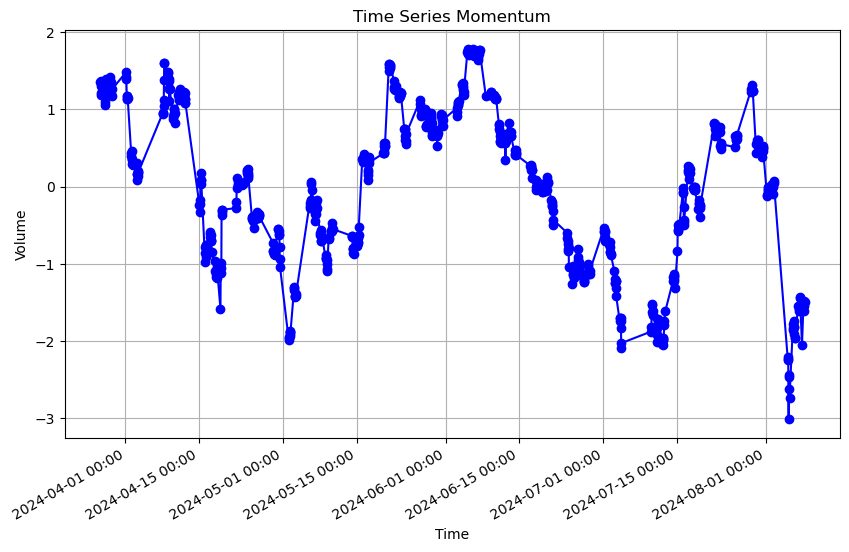

In [6]:

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

# 将数据转换为 DataFrame
df = pd.DataFrame(my_data)

# 将 'createdAt' 列转换为日期时间对象
df['createdAt'] = pd.to_datetime(df['createdAt'])

# 绘制时间序列数据
plt.figure(figsize=(10, 6))
plt.plot(df['createdAt'], df['volume'], marker='o', linestyle='-', color='b')

# 格式化 x 轴的时间显示
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M'))

# 设置标题和标签
plt.title('Time Series Momentum')
plt.xlabel('Time')
plt.ylabel('Volume')

# 显示网格
plt.grid(True)

# 自动调整 x 轴日期标签显示
plt.gcf().autofmt_xdate()

# 显示图形
plt.show()

### Record My Transactions

In [41]:
transactions = [
	(1, 'META', 'buy', 4, 471.51),
]

In [42]:
from datetime import datetime
import time 

# API URL
transaction_url = 'http://localhost:1234/transactions'

# 遍历并逐一发送请求
for user_id, stock_id, transaction_type, quantity, price in transactions:
    # 准备请求数据
    data = {
        'stock_id': stock_id,
        'transaction_type': transaction_type,
        'quantity': quantity,
        'price': price,
        'transaction_date': datetime.now().strftime('%Y-%m-%d')
    }
    
    # 发送 POST 请求
    response = requests.post(transaction_url, headers=headers, json=data)
    
    if str(response.status_code).startswith('2'):
        print(f'Successfully inserted: {data}')
    else:
        print(f'Failed to insert: {data}, Status code: {response.status_code}, Response: {response.text}')
        
    time.sleep(2)

Successfully inserted: {'stock_id': 'META', 'transaction_type': 'sell', 'quantity': 4, 'price': 471.51, 'transaction_date': '2024-08-08'}


### MY Portfolio

In [43]:
my_portfolio = []
portfolio_url = 'http://localhost:1234/portfolio'

response = requests.get(portfolio_url, headers=headers)

if response.status_code == 200:
    my_portfolio = response.json()
    print('Response data:', my_portfolio)
else:
    print('Request failed with status code:', response.status_code)

Response data: [{'id': 20, 'user_id': 1, 'stock_id': 'META', 'quantity': 0, 'average_price': '471.51', 'createdAt': '2024-08-08T08:57:19.000Z', 'updatedAt': '2024-08-08T09:02:57.000Z'}, {'id': 21, 'user_id': 1, 'stock_id': 'SNPS', 'quantity': 7, 'average_price': '536.70', 'createdAt': '2024-08-08T08:57:21.000Z', 'updatedAt': '2024-08-08T08:58:00.000Z'}, {'id': 22, 'user_id': 1, 'stock_id': 'PANW', 'quantity': 13, 'average_price': '275.15', 'createdAt': '2024-08-08T08:57:23.000Z', 'updatedAt': '2024-08-08T08:57:23.000Z'}, {'id': 23, 'user_id': 1, 'stock_id': 'GOOG', 'quantity': 23, 'average_price': '149.45', 'createdAt': '2024-08-08T08:57:25.000Z', 'updatedAt': '2024-08-08T08:57:25.000Z'}, {'id': 24, 'user_id': 1, 'stock_id': 'DDOG', 'quantity': 29, 'average_price': '122.24', 'createdAt': '2024-08-08T08:57:27.000Z', 'updatedAt': '2024-08-08T08:57:54.000Z'}, {'id': 25, 'user_id': 1, 'stock_id': 'AMD', 'quantity': 65, 'average_price': '152.04', 'createdAt': '2024-08-08T08:57:29.000Z', 'up

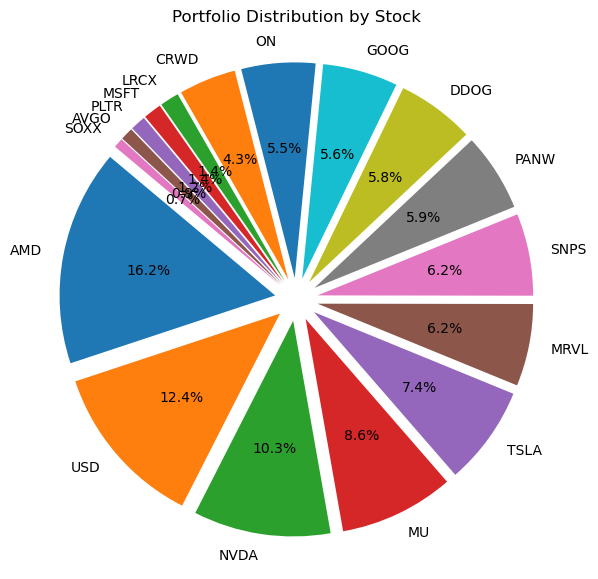

In [49]:
import matplotlib.pyplot as plt

# 计算每个 stock_id 的总价值
portfolio_values = {}
for item in my_portfolio:
    stock_id = item['stock_id']
    quantity = item['quantity']
    average_price = float(item['average_price'])  # 转换为浮点数
    total_value = quantity * average_price
    if stock_id in portfolio_values:
        portfolio_values[stock_id] += total_value
    else:
        portfolio_values[stock_id] = total_value

# 计算投资组合中剩余的 USD 价值
portfolio_values['USD'] = 3812.6 + 3755.24

portfolio_values = {k: v for k, v in portfolio_values.items() if v > 0}

sorted_portfolio_values = dict(sorted(portfolio_values.items(), key=lambda item: item[1], reverse=True))

# 准备数据绘制饼图
labels = sorted_portfolio_values.keys()
sizes = sorted_portfolio_values.values()
colors = plt.get_cmap('tab10').colors  # 使用预设的颜色映射
explode = [0.1] * len(labels)  # 使每个切片稍微突出

# 绘制饼图
plt.figure(figsize=(10, 7))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Portfolio Distribution by Stock')
plt.show()